# Shortest Path

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Priority queue (Explained in the Introducing priority queues section)

In [2]:
from heapq import heapify, heappop, heappush

class priority_queue():
    def __init__(self):
        self.queue = list()
        heapify(self.queue)
        self.index = dict()
    def push(self, priority, label):
        if label in self.index:
            self.queue = [(w,l) 
                          for w,l in self.queue if l!=label]
            heapify(self.queue)
        heappush(self.queue, (priority, label))
        self.index[label] = priority 
    def pop(self):
        if self.queue:
            return heappop(self.queue)
    def __contains__(self, label):
        return label in self.index
    def __len__(self):
        return len(self.queue)

## Directed graphs

In [3]:
graph = {'A': {'B':2, 'C':3},
         'B': {'C':2, 'D':2},
         'C': {'D':3, 'E':2},
         'D': {'F':3},
         'E': {'D':1,'F':1},
         'F': {}}

In [4]:
Graph = nx.DiGraph()
for node in graph:
    Graph.add_nodes_from(node)
    for edge, weight in graph[node].items():
        Graph.add_edge(node, edge, weight=weight)

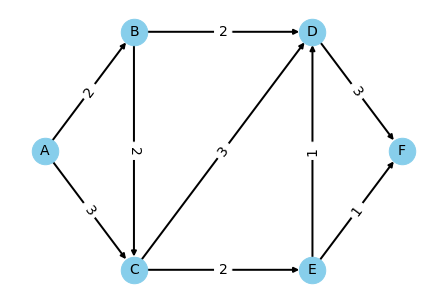

In [5]:
pos = { 'A': [0.00, 0.50], 'B': [0.25, 0.75],
        'C': [0.25, 0.25], 'D': [0.75, 0.75],
        'E': [0.75, 0.25], 'F': [1.00, 0.50]}

labels = nx.get_edge_attributes(Graph,'weight')

draw_params = {'with_labels':True,
               'arrows': True,
               'node_color':'skyblue',
               'node_size':700, 'width':2, 
               'font_size':14}

nx.draw(Graph, pos, **draw_params)
nx.draw_networkx_edge_labels(Graph, pos,
                             font_size=14,
                             edge_labels=labels)
plt.show()

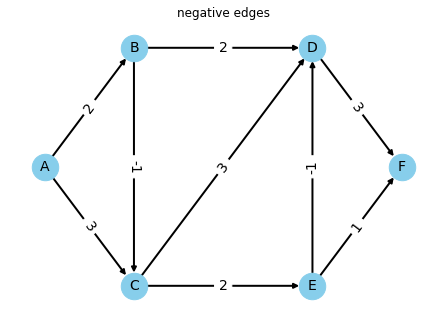

In [6]:
ngraph = {'A': {'B':2, 'C':3},
          'B': {'C':-1, 'D':2},
          'C': {'D':3, 'E':2},
          'D': {'F':3},
          'E': {'D':-1,'F':1},
          'F': {}}

nGraph = nx.DiGraph()
for node in ngraph:
    nGraph.add_nodes_from(node)
    for edge, weight in ngraph[node].items():
        nGraph.add_edge(node, edge, weight=weight)
        
labels = nx.get_edge_attributes(nGraph,'weight')

nx.draw(nGraph, pos, **draw_params)
nx.draw_networkx_edge_labels(nGraph, pos,
                             font_size=14,
                             edge_labels=labels)
plt.title("negative edges")
plt.show()

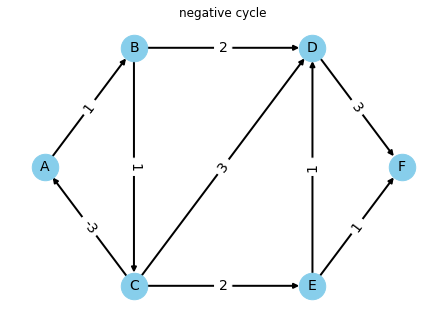

In [7]:
ncgraph = {'A': {'B':1},
          'B': {'C':1, 'D':2},
          'C': {'A':-3, 'D':3, 'E':2},
          'D': {'F':3},
          'E': {'D':1,'F':1},
          'F': {}}

ncGraph = nx.DiGraph()
for node in ncgraph:
    ncGraph.add_nodes_from(node)
    for edge, weight in ncgraph[node].items():
        ncGraph.add_edge(node, edge, weight=weight)
        
labels = nx.get_edge_attributes(ncGraph,'weight')

nx.draw(ncGraph, pos, **draw_params)
nx.draw_networkx_edge_labels(ncGraph, pos,
                             font_size=14,
                             edge_labels=labels)
plt.title("negative cycle")
plt.show()

## Dijkstra algorithm

In [8]:
def dijkstra(graph, start, end):
    inf = float('inf')
    known = set()
    priority = priority_queue()
    path = {start: start}

    for vertex in graph:
        if vertex == start:
            priority.push(0, vertex)
        else:
            priority.push(inf, vertex)

    last = start    
    while last != end:
        (weight, actual_node) = priority.pop()
        if actual_node not in known:
            for next_node in graph[actual_node]:
                upto_actual = priority.index[actual_node]
                upto_next = priority.index[next_node]
                to_next = upto_actual + \
                graph[actual_node][next_node]
                if to_next < upto_next:
                    priority.push(to_next, next_node)
                    print("Found shortcut from %s to %s" 
                          % (actual_node, next_node))
                    print("\tTotal length up so far: %i" 
                           % to_next)
                    path[next_node] = actual_node
                    
            last = actual_node
            known.add(actual_node)
    
    return priority.index, path

In [9]:
dist, path = dijkstra(graph, 'A', 'F')

Found shortcut from A to B
	Total length up so far: 2
Found shortcut from A to C
	Total length up so far: 3
Found shortcut from B to D
	Total length up so far: 4
Found shortcut from C to E
	Total length up so far: 5
Found shortcut from D to F
	Total length up so far: 7
Found shortcut from E to F
	Total length up so far: 6


In [10]:
def reverse_path(path, start, end):
    progression = [end]
    while progression[-1] != start:
        progression.append(path[progression[-1]])
    return progression[::-1]    

In [11]:
print(reverse_path(path, 'A', 'F'))

['A', 'C', 'E', 'F']


In [12]:
print(dist)

{'A': 0, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6}


## Bellman-Ford algorithm

In [13]:
def bellman_ford(graph, start):
    inf = float('inf')
    distance = {node: inf if node!=start else 0.0 for node in graph}
    previous = {node: None for node in graph}

    for actual_node in graph:
        for next_node in graph[actual_node]:
            edge_weight = graph[actual_node][next_node]
            tempDistance = distance[actual_node] + edge_weight
            if tempDistance < distance[next_node]:
                distance[next_node] = tempDistance
                previous[next_node] = actual_node
    return distance, previous

In [14]:
def detect_negative_cycle(graph, distance, previous):           
    for actual_node in graph:
        for next_node in graph[actual_node]:      
            edge_weight = graph[actual_node][next_node]
            if distance[actual_node] + edge_weight < distance[next_node]:
                return True
    return False
        
def retrace_shortest_path(previous, end):
    path = [end]
    while path[0] != 'A':
        path = [previous[end]] + path
        end = previous[end]
    return path

In [15]:
distance, previous = bellman_ford(graph, 'A')
print(distance)
print("path:", retrace_shortest_path(previous, 'F'))
neg_cycle = detect_negative_cycle(graph, distance, previous)
print(f"There are negative cycles in the graph: {neg_cycle}")

{'A': 0.0, 'B': 2.0, 'C': 3.0, 'D': 4.0, 'E': 5.0, 'F': 6.0}
path: ['A', 'C', 'E', 'F']
There are negative cycles in the graph: False


In [16]:
distance, previous = bellman_ford(ngraph, 'A')
print(distance)
print("path:", retrace_shortest_path(previous, 'F'))
neg_cycle = detect_negative_cycle(ngraph, distance, previous)
print(f"There are negative cycles in the graph: {neg_cycle}")

{'A': 0.0, 'B': 2.0, 'C': 1.0, 'D': 2.0, 'E': 3.0, 'F': 4.0}
path: ['A', 'B', 'C', 'E', 'F']
There are negative cycles in the graph: False


In [17]:
distance, previous = bellman_ford(ncgraph, 'A')
print(distance)
print("path:", retrace_shortest_path(previous, 'F'))
neg_cycle = detect_negative_cycle(ncgraph, distance, previous)
print(f"There are negative cycles in the graph: {neg_cycle}")

{'A': -1.0, 'B': 1.0, 'C': 2.0, 'D': 3.0, 'E': 4.0, 'F': 5.0}
path: ['A', 'B', 'C', 'E', 'F']
There are negative cycles in the graph: True


## Floyd-Warshall algorithm

In [18]:
graph = graph

def dist(graph, start, end):
    if end in graph[start]:
        return float(graph[start][end])
    elif start==end:
        return 0.0
    else:
        return float('inf')

def floyd_warshall(graph): 
    
    mat = {row: {col: dist(graph, row, col)
                 for col in graph} for row in graph}

    for k in mat:
        for i in mat:
            for j in mat:
                if mat[i][j] > mat[i][k] + mat[k][j]:
                    mat[i][j] = mat[i][k] + mat[k][j]
    
    return mat

In [19]:
def print_mat(mat):
    els = [item for item in mat]
    labels = [' '] + [item for item in els]
    printable = [labels]
    for k, row in enumerate(els):
        printable.append([labels[k+1]] + [mat[row][col] for col in els])
    return printable

def extract_diagonal(mat):
    return [mat[item][item] for item in mat]

In [20]:
print_mat(floyd_warshall(graph))

[[' ', 'A', 'B', 'C', 'D', 'E', 'F'],
 ['A', 0.0, 2.0, 3.0, 4.0, 5.0, 6.0],
 ['B', inf, 0.0, 2.0, 2.0, 4.0, 5.0],
 ['C', inf, inf, 0.0, 3.0, 2.0, 3.0],
 ['D', inf, inf, inf, 0.0, inf, 3.0],
 ['E', inf, inf, inf, 1.0, 0.0, 1.0],
 ['F', inf, inf, inf, inf, inf, 0.0]]

In [21]:
print_mat(floyd_warshall(ngraph))

[[' ', 'A', 'B', 'C', 'D', 'E', 'F'],
 ['A', 0.0, 2.0, 1.0, 2.0, 3.0, 4.0],
 ['B', inf, 0.0, -1.0, 0.0, 1.0, 2.0],
 ['C', inf, inf, 0.0, 1.0, 2.0, 3.0],
 ['D', inf, inf, inf, 0.0, inf, 3.0],
 ['E', inf, inf, inf, -1.0, 0.0, 1.0],
 ['F', inf, inf, inf, inf, inf, 0.0]]

In [22]:
mat = floyd_warshall(ncgraph)
extract_diagonal(mat)

[-1.0, -1.0, -2.0, 0.0, 0.0, 0.0]